In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version 0.0.3


In [3]:
from pyndamics import Simulation
from pyndamics.emcee import *

pyndamics version  0.0.10


In [6]:
data=pd.read_csv('data/FluNetInteractiveReport.csv',skiprows=3)
data.head()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,United States of America,Region of the Americas of WHO,North America,2017,1,2017-01-02,2017-01-08,38960,38960,0,...,NaN,4301,6421,60,47,405,512,6933,32027,No Report
1,United States of America,Region of the Americas of WHO,North America,2017,2,2017-01-09,2017-01-15,39546,39546,0,...,NaN,4965,7224,76,49,501,626,7850,31696,No Report
2,United States of America,Region of the Americas of WHO,North America,2017,3,2017-01-16,2017-01-22,41010,41010,0,...,NaN,6086,8396,104,69,681,854,9250,31760,No Report
3,United States of America,Region of the Americas of WHO,North America,2017,4,2017-01-23,2017-01-29,42620,42620,0,...,NaN,6283,8761,123,71,827,1021,9782,32838,No Report
4,United States of America,Region of the Americas of WHO,North America,2017,5,2017-01-30,2017-02-05,46521,46521,0,...,NaN,7809,10456,182,96,1147,1425,11881,34640,No Report


In [17]:
t=array(data['Year']+(data['Week']-1)/52)
y=array(data['ALL_INF'])

y=y[(t>=2017.5) & (t<=2018.5)]
t=t[(t>=2017.5) & (t<=2018.5)]

t=(t-t[0])*365.25

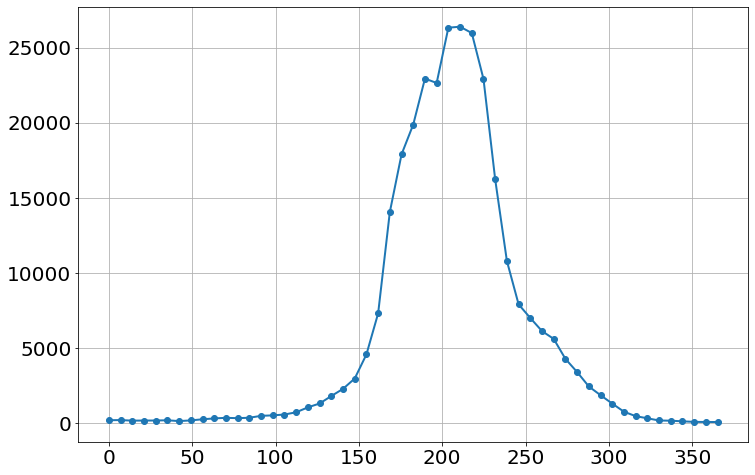

In [18]:
plot(t,y,'-o')

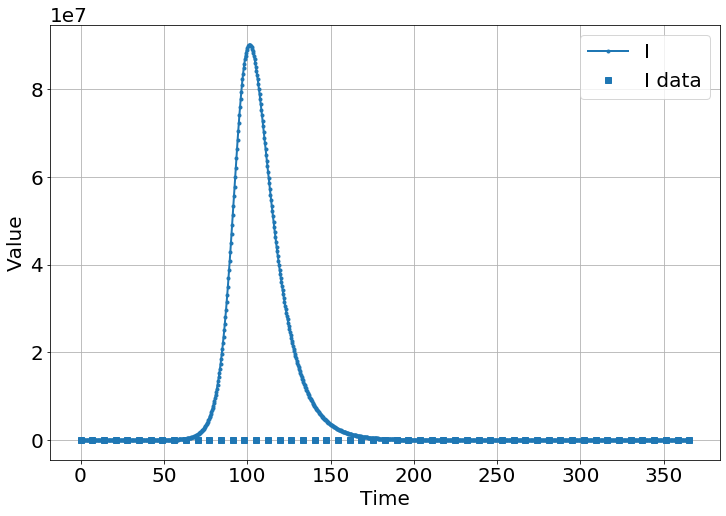

<Figure size 864x576 with 0 Axes>

In [19]:
sim=Simulation()
sim.add("N=S+I+R")
sim.add(" S' = -β*S*I/N",3e8)
sim.add(" I' = +β*S*I/N - γ*I",1,plot=True)
sim.add(" R' = +γ*I",0)
sim.add_data(t=t,I=y,plot=True)
sim.params(β=0.3,γ=0.1)
sim.run(0,365)

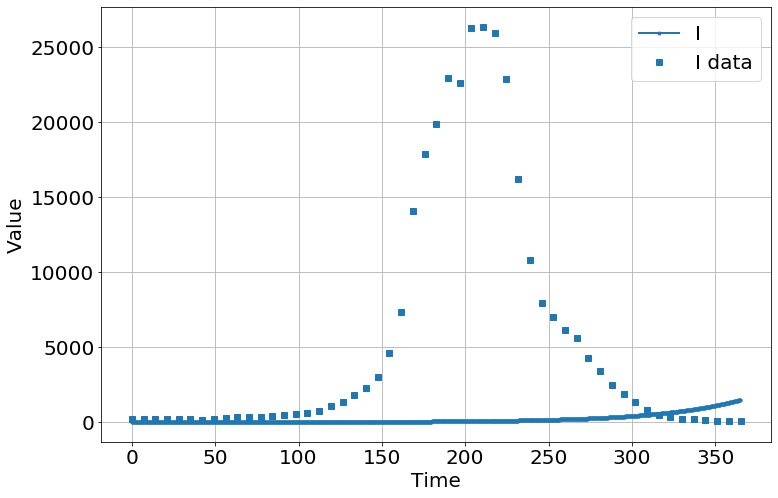

<Figure size 864x576 with 0 Axes>

In [27]:
sim=Simulation()
sim.add("N=S+I+R")
sim.add(" S' = -β*S*I/N",3e8)
sim.add(" I' = +β*S*I/N - γ*I",1,plot=True)
sim.add(" R' = +γ*I",0)
sim.add_data(t=t,I=y,plot=True)
sim.params(β=0.08,γ=0.06)
sim.run(0,365)

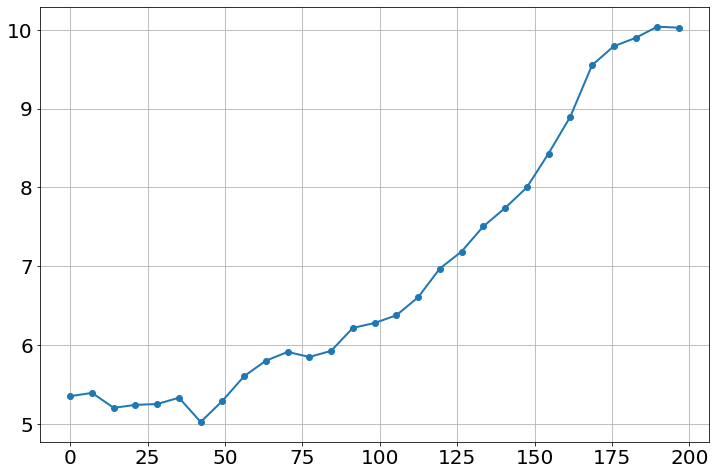

In [29]:
t1=t[t<200]
y1=log(y[t<200])
plot(t1,y1,'-o')

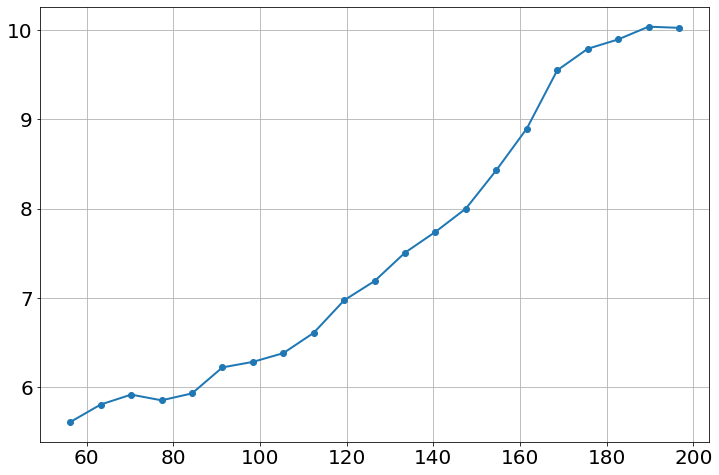

In [30]:
t1=t[(t<200) & (t>50)]
y1=log(y[(t<200) & (t>50)])
plot(t1,y1,'-o')



In [31]:
model=ols('y ~ x', data={'y':y1,'x':t1})
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     388.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.14e-14
Time:                        13:50:13   Log-Likelihood:                -6.8950
No. Observations:                  21   AIC:                             17.79
Df Residuals:                      19   BIC:                             19.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0362      0.242     12.558      0.000       2.530       3.542
x              0.0357      0.002     19.714      0.000       0.032       0.040
==============================================================================
Omnibus:                        5.647   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.994
Skew:                           0.351   Prob(JB):                        0.369
Kurtosis:                       1.664   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
m=results.params['x']
m

0.035729458170750364

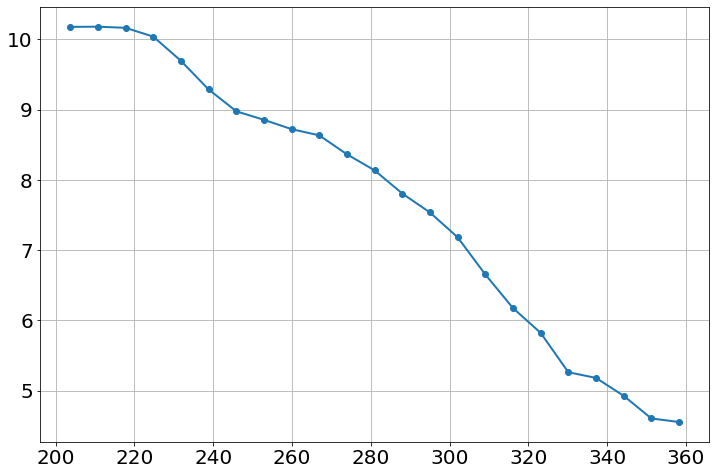

In [33]:
t2=t[(t>200) & (t<365)]
y2=log(y[(t>200) & (t<365)])
plot(t2,y2,'-o')

In [35]:
model=ols('y ~ x', data={'y':y2,'x':t2})
results=model.fit()
print(results.summary())
m=results.params['x']
m

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     873.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.36e-18
Time:                        13:51:55   Log-Likelihood:                -4.1881
No. Observations:                  23   AIC:                             12.38
Df Residuals:                      21   BIC:                             14.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9816      0.387     49.020      0.0

-0.040178303070853655

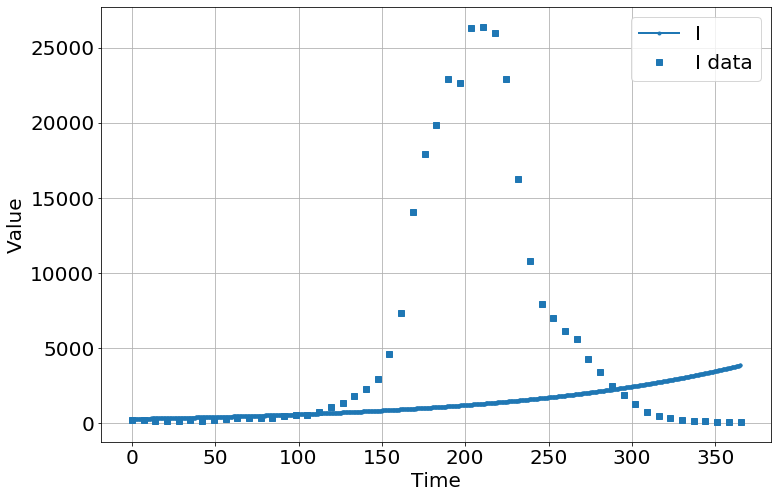

<Figure size 864x576 with 0 Axes>

In [45]:
sim=Simulation()
sim.add("N=S+I+R")
sim.add(" S' = -β*S*I/N",3e8)
sim.add(" I' = +β*S*I/N - γ*I",300,plot=True)
sim.add(" R' = +γ*I",0)
sim.add_data(t=t,I=y,plot=True)
sim.params(β=0.037,γ=0.03)
sim.run(0,365)

In [62]:
model=MCMCModel(sim,
               β=Normal(0.05,2,all_positive=True),
               γ=Normal(0.05,2,all_positive=True),
               initial_I=Uniform(1,100),)

Sampling Prior...
Done.
1.01 s
Running MCMC 1/5...
Done.
1 m, 15.15 s
Running MCMC 2/5...
Done.
1 m, 0.57 s
Running MCMC 3/5...
Done.
1 m, 0.05 s
Running MCMC 4/5...
Done.
1 m, 14.41 s
Running MCMC 5/5...
Done.
1 m, 25.42 s


<Figure size 864x576 with 0 Axes>

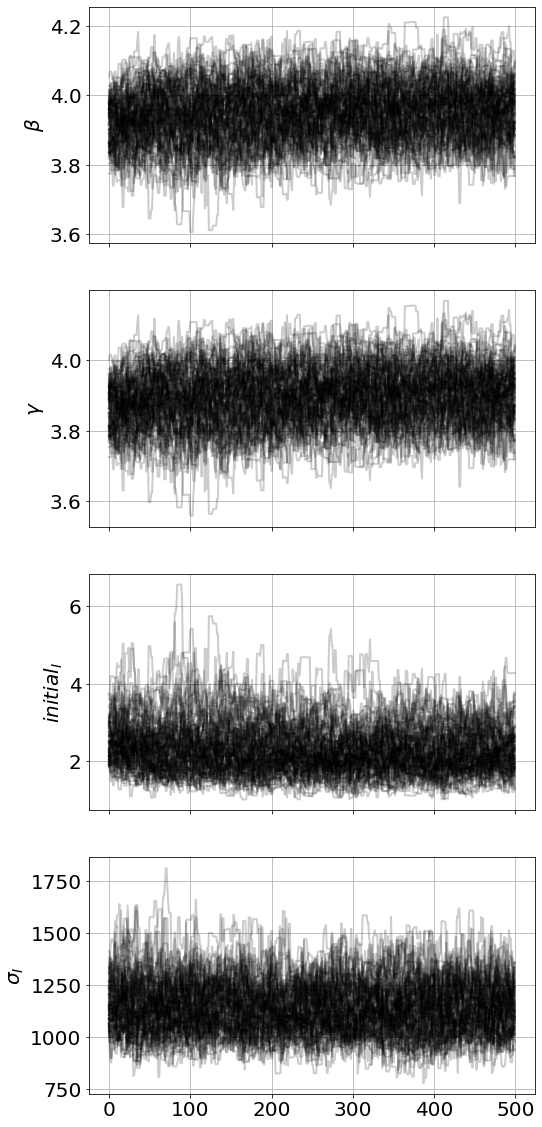

In [63]:
model.run_mcmc(500,repeat=5)
model.plot_chains()

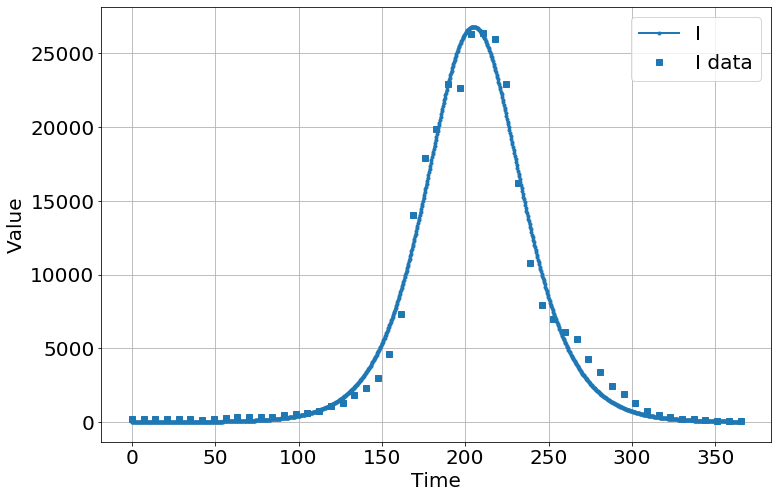

<Figure size 864x576 with 0 Axes>

In [64]:
sim.run(0,365)

In [76]:
Ro=model.eval('β/γ')

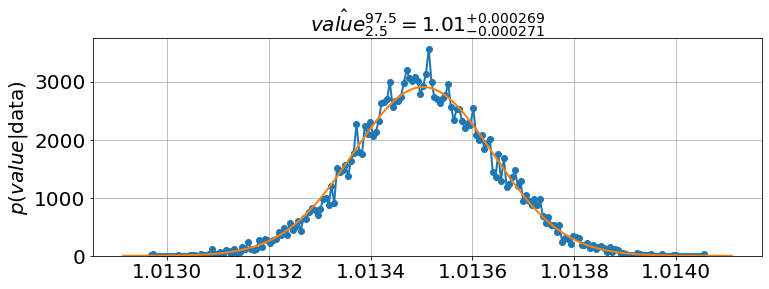

In [77]:
model.plot_distributions(Ro)

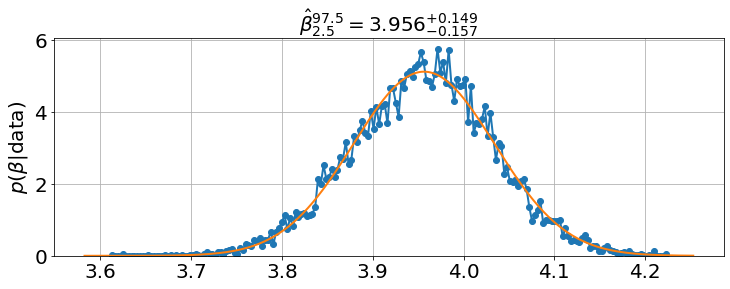

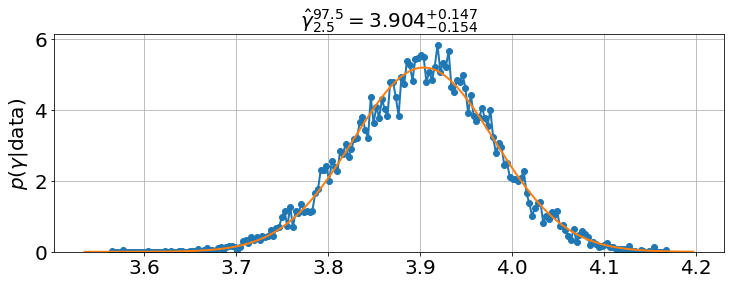

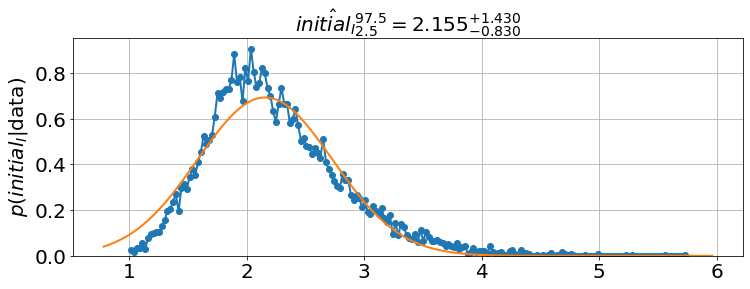

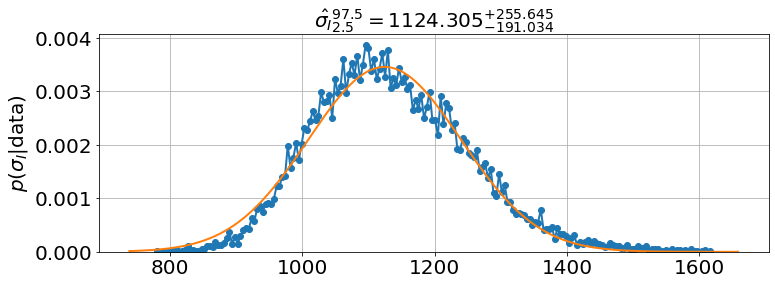

In [78]:
model.plot_distributions()

## Measles in a school

In [79]:
data=pd.read_excel('data/measles_hagelloch_1861.xlsx')
data.head()

,Column1,case_ID,infector,day,date_of_prodrome,date_of_rash,date_of_death,age,gender,family_ID,class,complications,x_loc,y_loc
0,1,1,45,22,-39487,-39483,NaN,7,f,41,1,yes,142.5,100.0
1,2,2,45,24,-39485,-39481,NaN,6,f,41,1,yes,142.5,100.0
2,3,3,172,29,-39480,-39476,NaN,4,f,41,0,yes,142.5,100.0
3,4,4,180,28,-39481,-39480,NaN,13,m,61,2,yes,165.0,102.5
4,5,5,45,23,-39486,-39481,NaN,8,f,42,1,yes,145.0,120.0


In [80]:
days=array(data['day'])
t=sorted(list(set(days)))
I=[]
for _ in t:
    I.append(sum(days==_))
t=array(t)
I=array(I)

t=t[:-1]
I=I[:-1]


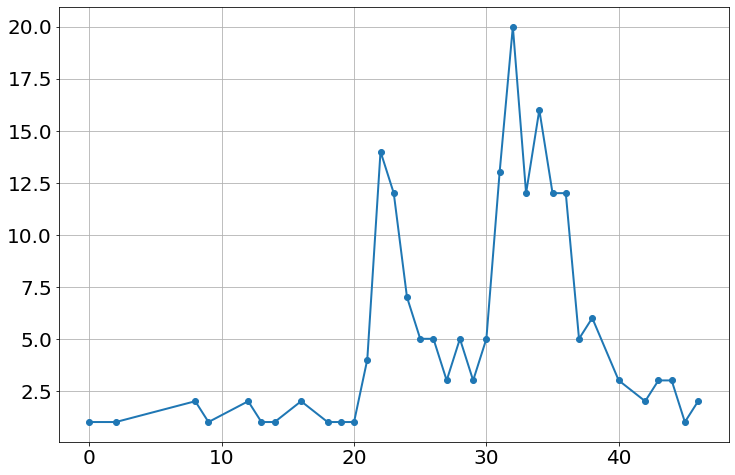

In [81]:
plot(t,I,'-o')

In [82]:
t,I

(array([ 0,  2,  8,  9, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45,
        46]),
 array([ 1,  1,  2,  1,  2,  1,  1,  2,  1,  1,  1,  4, 14, 12,  7,  5,  5,
         3,  5,  3,  5, 13, 20, 12, 16, 12, 12,  5,  6,  3,  2,  3,  3,  1,
         2]))

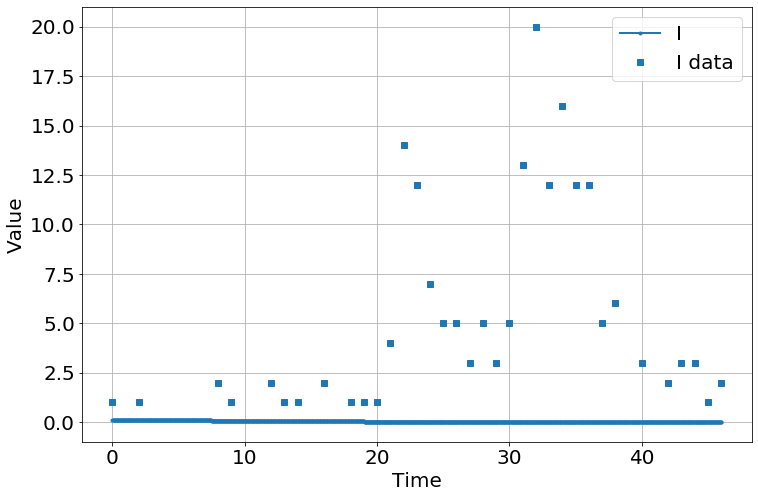

<Figure size 864x576 with 0 Axes>

In [86]:
sim=Simulation()
sim.add("N=S+I+R")
sim.add("S'=-β*S*I/N",188)
sim.add("I'=β*S*I/N-γ*I",.1,plot=True)
sim.add("R'=γ*I",0)
sim.params(β=4,γ=4)
sim.add_data(t=t,I=I,plot=True)
sim.run(0,t.max())

In [87]:
model=MCMCModel(sim,
                β=Normal(.4,.4),
                initial_I=Uniform(0,10),
                γ=Normal(.4,.4),
                )

Sampling Prior...
Done.
0.96 s
Running MCMC 1/2...
Done.
51.55 s
Running MCMC 2/2...
Done.
54.87 s


<Figure size 864x576 with 0 Axes>

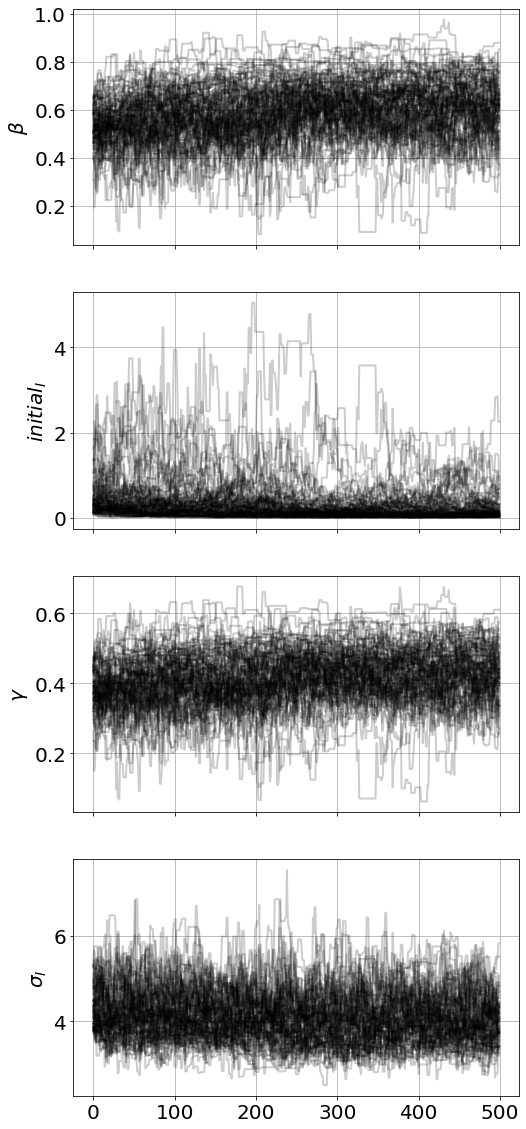

In [88]:
model.run_mcmc(500,repeat=2)
model.plot_chains()

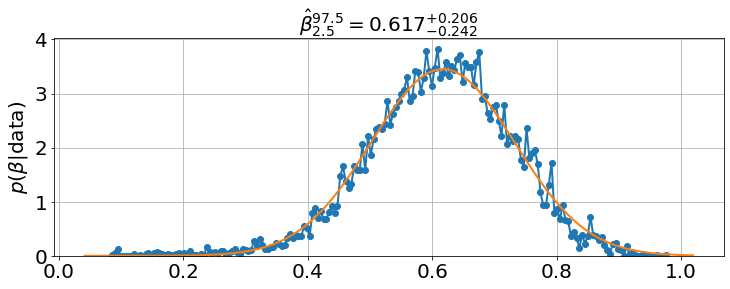

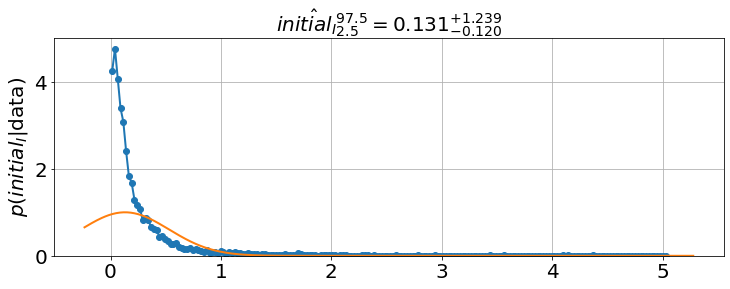

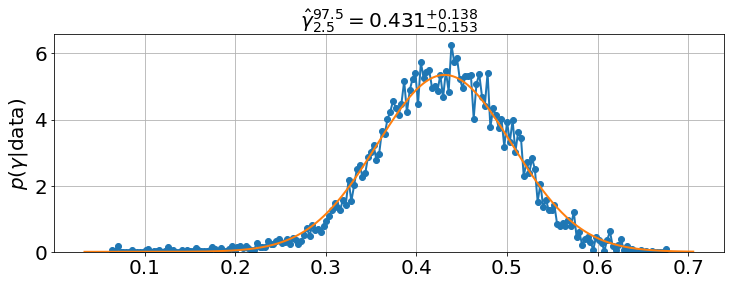

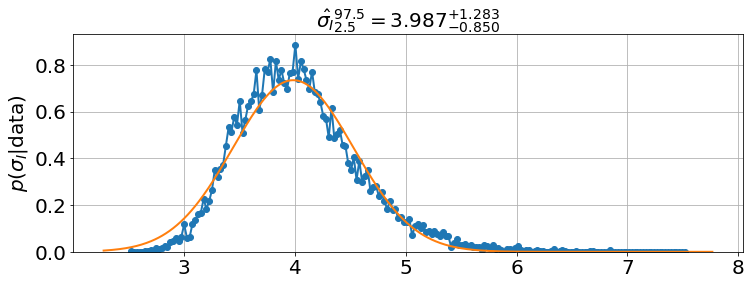

In [89]:
model.plot_distributions()

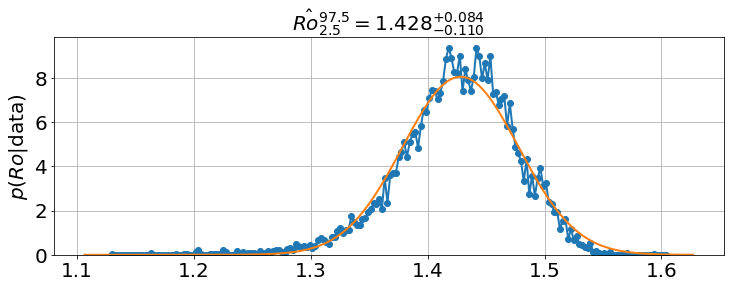

In [95]:
model.plot_distributions(Ro=model.eval('β/γ'))

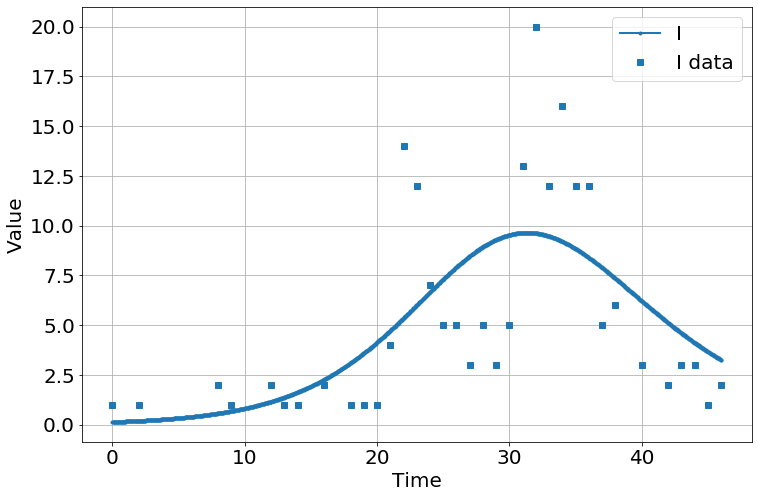

<Figure size 864x576 with 0 Axes>

In [91]:
sim.run(0,t.max())